## 1. 이번 파트에서는 신경망 구조에서 역전파를 효율적으로 구할 수 있는 방법을 배울 것임.
## 2. 이를 python에서 class로 구현하여 매우 간단한 방법으로 역전파를 구할 수  있다는 것을 알게될 것임.
## 3. 신경망 구조에서 크게 선형변환, 비선형변환, 손실함수 에 대한 역전파를 구현해볼 것임.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 5.5 활성화 함수 계층 구현하기
### 5.5.1. ReLU 계층

In [2]:
class Relu :
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx

- ReLU 함수의 작동을 이해하기 위해 (5행 2열) 데이터 생성 : 특징이 2개이고 5개의 데이터들이라고 생각해볼 수 있음

In [3]:
X = np.random.randn(5,2)
print(X)

[[ 0.77414826 -0.38732159]
 [-0.69382838 -0.19236996]
 [ 1.15020348 -0.21682265]
 [ 2.26005624  0.3346226 ]
 [-1.29235242 -0.83039738]]


- ReLU의 전파를 거치면 0과 같거나 작으면 0을 출력, 그 외는 그대로 값을 출력함

In [4]:
relu = Relu()
result = relu.forward(X)
print(result)

[[0.77414826 0.        ]
 [0.         0.        ]
 [1.15020348 0.        ]
 [2.26005624 0.3346226 ]
 [0.         0.        ]]


- ReLU의 역전파를 이해해보기 위해 역전파 전달 값 dout은 전파값을 줘보고 계산해봄   
- 아래 출력의 의미는 ReLU 함수의 역전파 단계에서는
1. 0과 같거나 작으면 미분 값=0
2. 그 외에는 자기 자신이 출력되므로 미분값=1 임

In [5]:
dout = result
back_result = relu.backward(dout)
print(back_result)

[[0.77414826 0.        ]
 [0.         0.        ]
 [1.15020348 0.        ]
 [2.26005624 0.3346226 ]
 [0.         0.        ]]


- ReLU class 내에서 mask를 사용하여 0으로 변환하는 방법

In [6]:
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)

[[ 1.  -0.5]
 [-2.   3. ]]


In [7]:
mask = (x <= 0)
print(mask)

[[False  True]
 [ True False]]


In [8]:
x[mask] = 0
print(x)

[[1. 0.]
 [0. 3.]]


## 
### 5.5.2. Sigmoid 계층

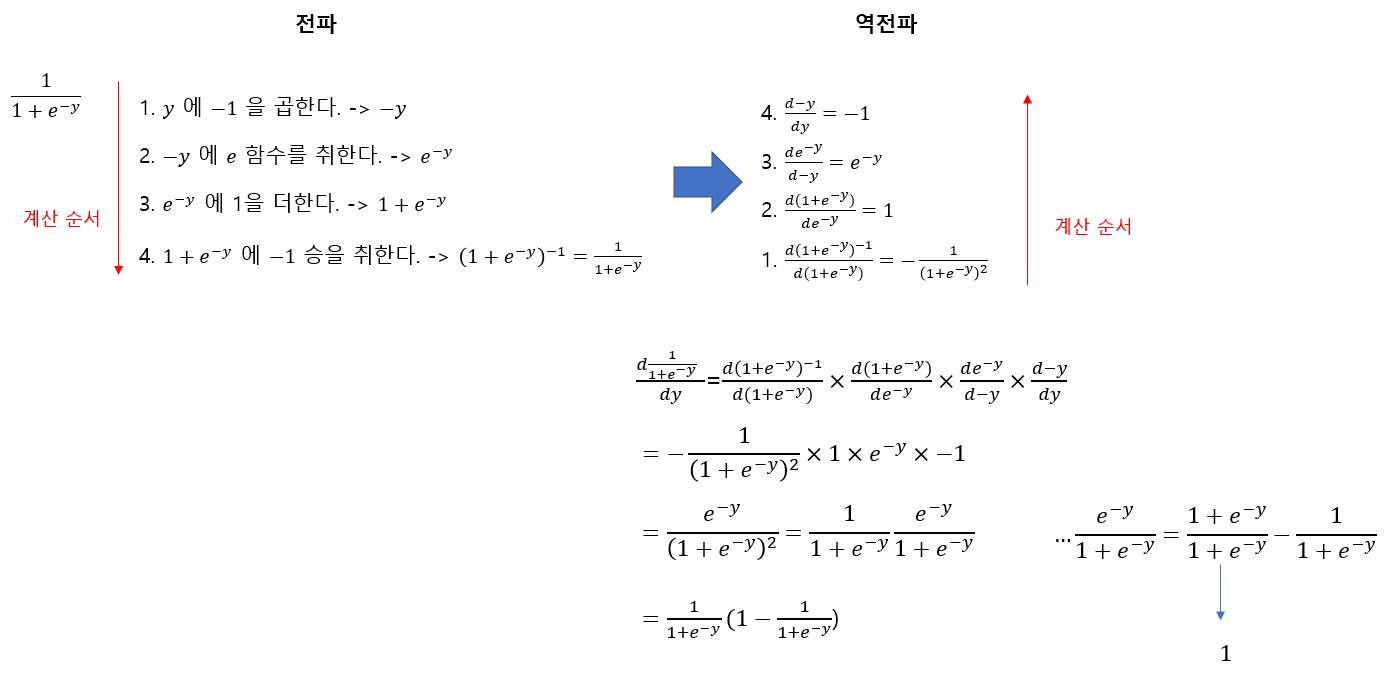

- 시그모이드 함수는 여러 간단한 함수들의 합성함수로 구성됨, 이를 역전파를 통해 간단한 함수들의 미분의 곱으로 표현할 수 있음
- 하지만 합성함수의 미분의 결과값을 보면 시그모이드(1-시그모이드) 형태로 간단하게 나오기 때문에 그대로 구현하는 것이 더 효율적임.

In [9]:
class Sigmoid:
    def __init__(self):
        self.out = None # 시그모이드 자신의 값을 저장하기 위해 / 역전파 때 메모리 절약으로 불러서 사용하려고
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out= out
        
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        
        return dx

In [10]:
X = np.random.randn(5,2)
print(X)

[[-0.35457459 -2.0413273 ]
 [-0.92167381  2.02396384]
 [ 1.2228886   1.99175568]
 [-2.87185038  0.10985877]
 [ 0.20092868 -0.34157087]]


- 시그모이드 함수의 전파를 보면 element wise로 연산을 수행하는 것을 볼 수 있음, 즉 모든 원소 하나하나를 각각 시그모이드 함수에 취한다는 의미임

In [11]:
sigmoid = Sigmoid()
result = sigmoid.forward(X)
print(result)

[[0.41227354 0.11493165]
 [0.28461697 0.88329026]
 [0.77257149 0.87992876]
 [0.05356277 0.5274371 ]
 [0.55006385 0.41542794]]


- 시그모이드 함수의 비선형성을 보기위해 5행 2열의 데이터 X에서 앞쪽 5행 1열의 데이터에 대해 시그모이드 취한 값을 시각화해봄
- 시그모이드 함수는 입력 받은 값을 0에서 1사이의 값으로 보내며 비선형적으로 값을 보내는 것을 볼 수 있음

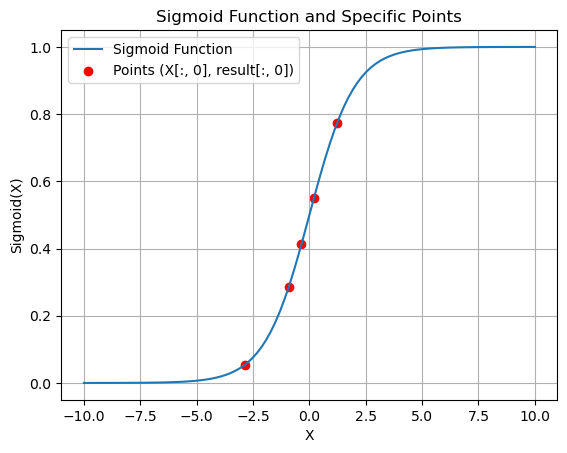

In [12]:
# Extract the data for 5th row and 1st column
x_values = X[:, 0]
result_values = result[:, 0]

# Plot the sigmoid function
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y, label='Sigmoid Function')

# Plot the specific points
plt.scatter(x_values, result_values, color='red', label='Points (X[:, 0], result[:, 0])')

plt.xlabel('X')
plt.ylabel('Sigmoid(X)')
plt.title('Sigmoid Function and Specific Points')
plt.legend()
plt.grid(True)
plt.show()

- 활성함수의 역전파에서 중요한 것은 (N, 2) 라는 N 개의 데이터와 2개의 특징으로 구성된 행렬에 대해 역전파 계산을 수행할 때   
- 전파에서 사용된 원소곱처럼 수행된다는 의미임.
- 이는 Deep Neural Network를 노드 그래프 방식으로 표현하여 쳐다보면 이해가 더 쉬움

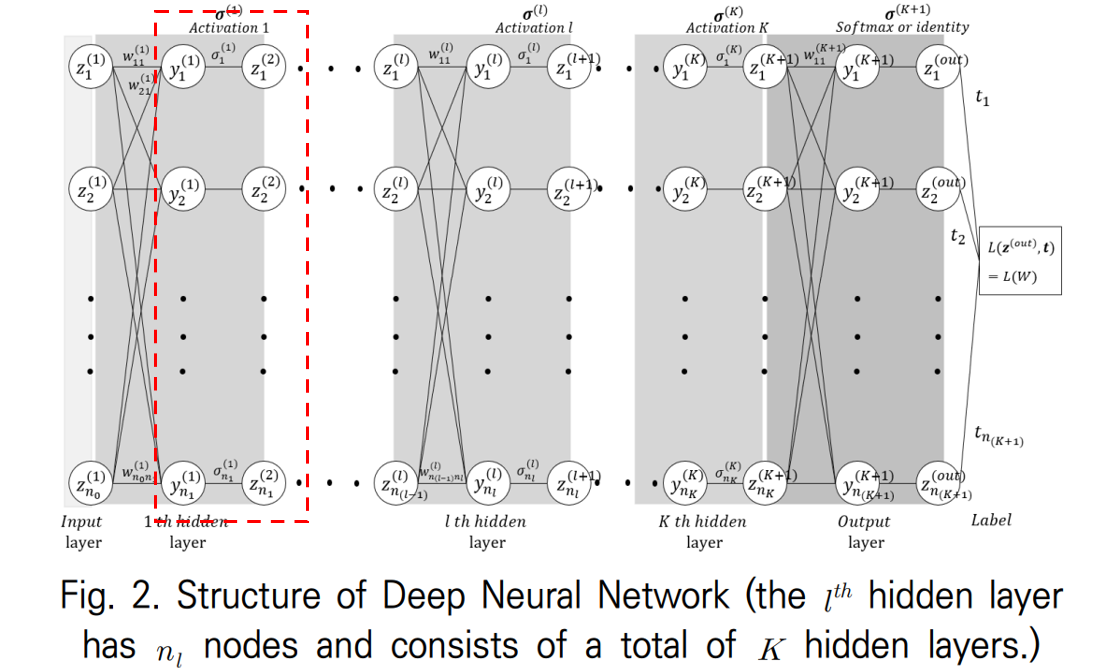

In [13]:
dout = result
back_result = sigmoid.backward(dout)
print(back_result)

[[0.09989555 0.01169112]
 [0.0579509  0.09105714]
 [0.13574451 0.09296812]
 [0.0027153  0.13146222]
 [0.13613729 0.10088567]]


## 5.6. Affine/Softmax 계층 구현하기

### 5.6.1. Affine 계층

- 어파인 변환(Affine transformation)은 신경망의 구성요소인 선형변환과 비선형변환 중 선형변환을 일컫는 말임.   
- 선형대수학에서는 엄밀하게 원점을 지나는 변환을 선형변환 / 원점이 아닌 다른 벡터 점만큼이동된 변환을 어파인변환 이라고 구분하여 일컬음.   
- 하지만 신경망에서 데이터를 선형성을 가진 형태로 변환하는 성질을 동일하므로 Affine, 선형변환 의미는 같은 의미로 받아들여 사용해도 무방함.

#### 물리학에서 Affine 을 사용하는 예 : Alice 와 Bob 이야기(서로 다른 좌표계로 같은 별을 바라보지만 특정 벡터만큼 움직이면 같은 좌표계로 설명가능함)
- 앨리스는 자신이 생각하는 원점에서 특정한 별을 보고 좌표를 계산하였고, 밥도 자신이 생각하는 원점에서 같은 별을 보고 좌표를 계산하였음.   
- 서로 같은 별을 보았지만 다른 좌표계로 쳐다봄으로써 다르다고 생각함.   
- 하지만 앨리스의 좌표계를 원점으로 생각했을 때 특정한 벡터만큼 전체 좌표를 움직인다면 밥이 생각하는 좌표계와 동일해짐.

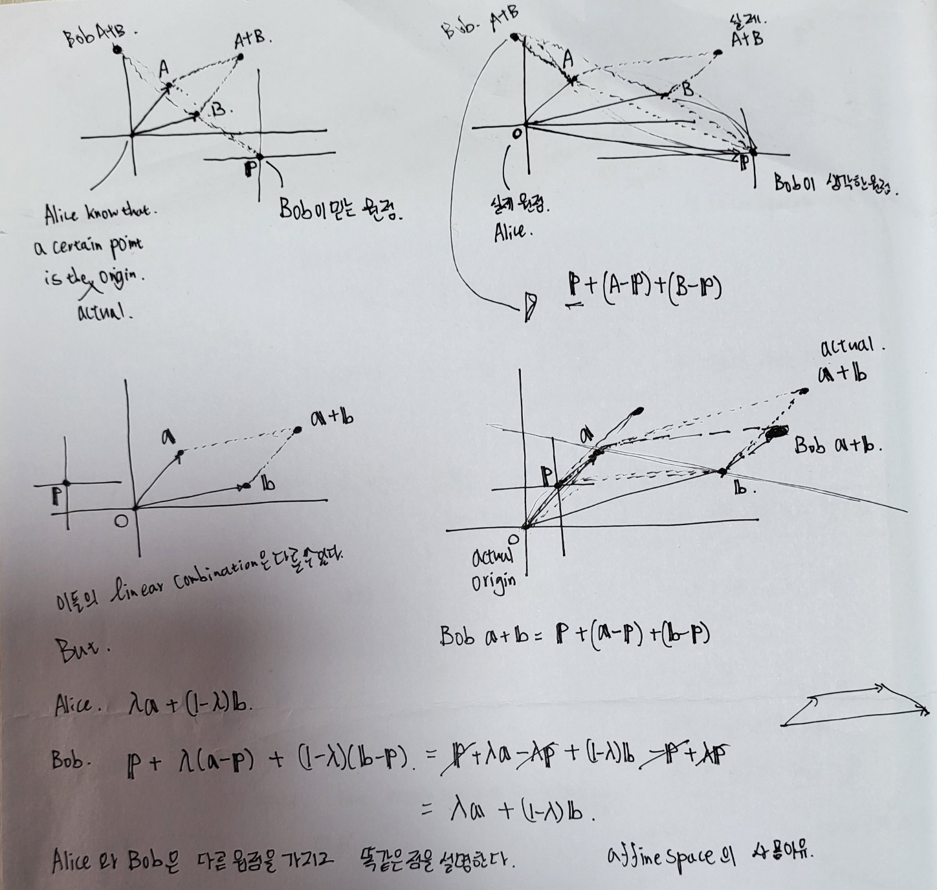

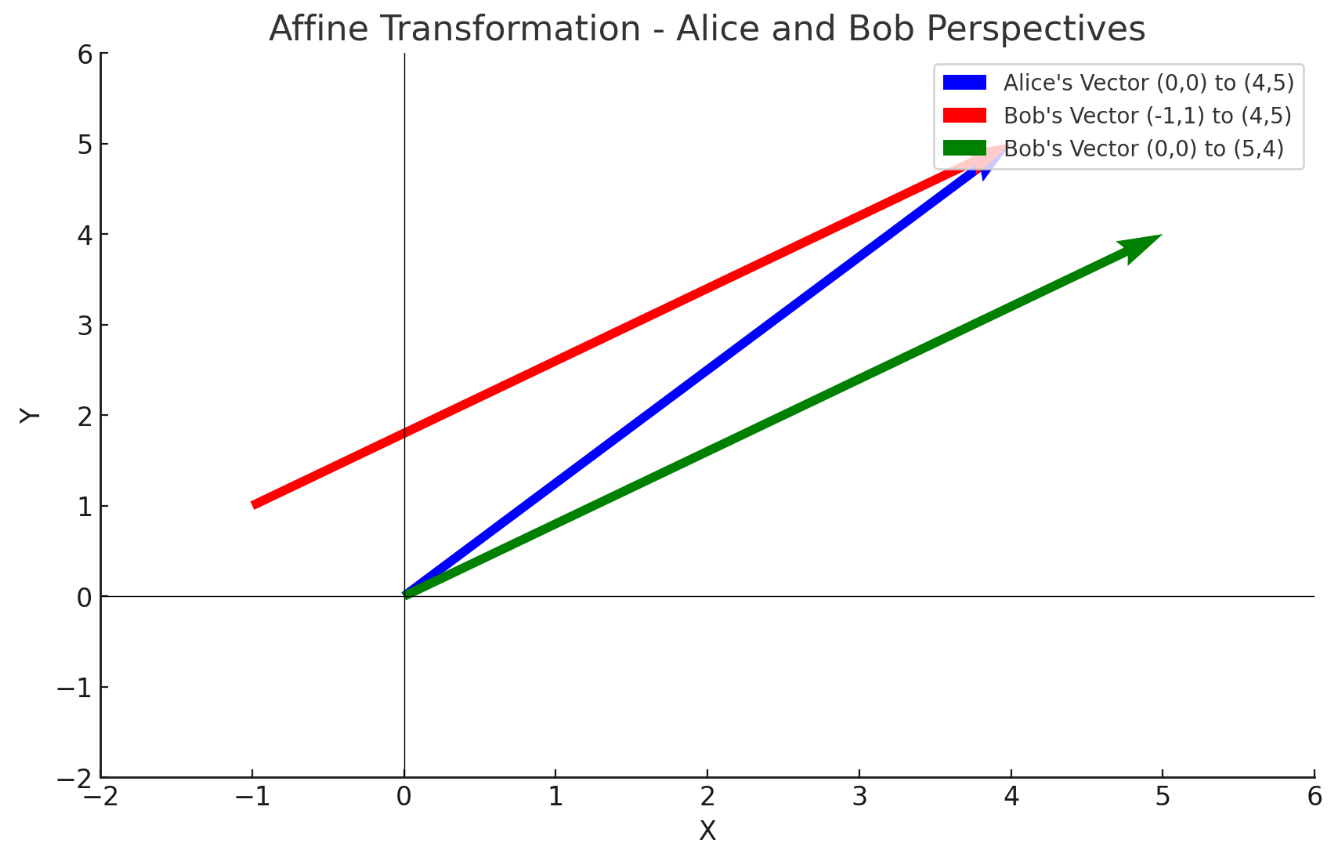

## 
#### 신경망의 선형변환과 선형회귀에서 Affine 의미 :
- 신경망의 선형변환과 선형회귀에서 "절편 혹은 편향" 파라미터는 Affine에서 편향된 벡터를 의미함
1. 데이터의 fitting line을 더 잘반영하기 위함임.
2. 그러므로 신경망의 선형변환과 선형회귀에서 사용되는 "가중치"와 "절편"은 모두 필요함

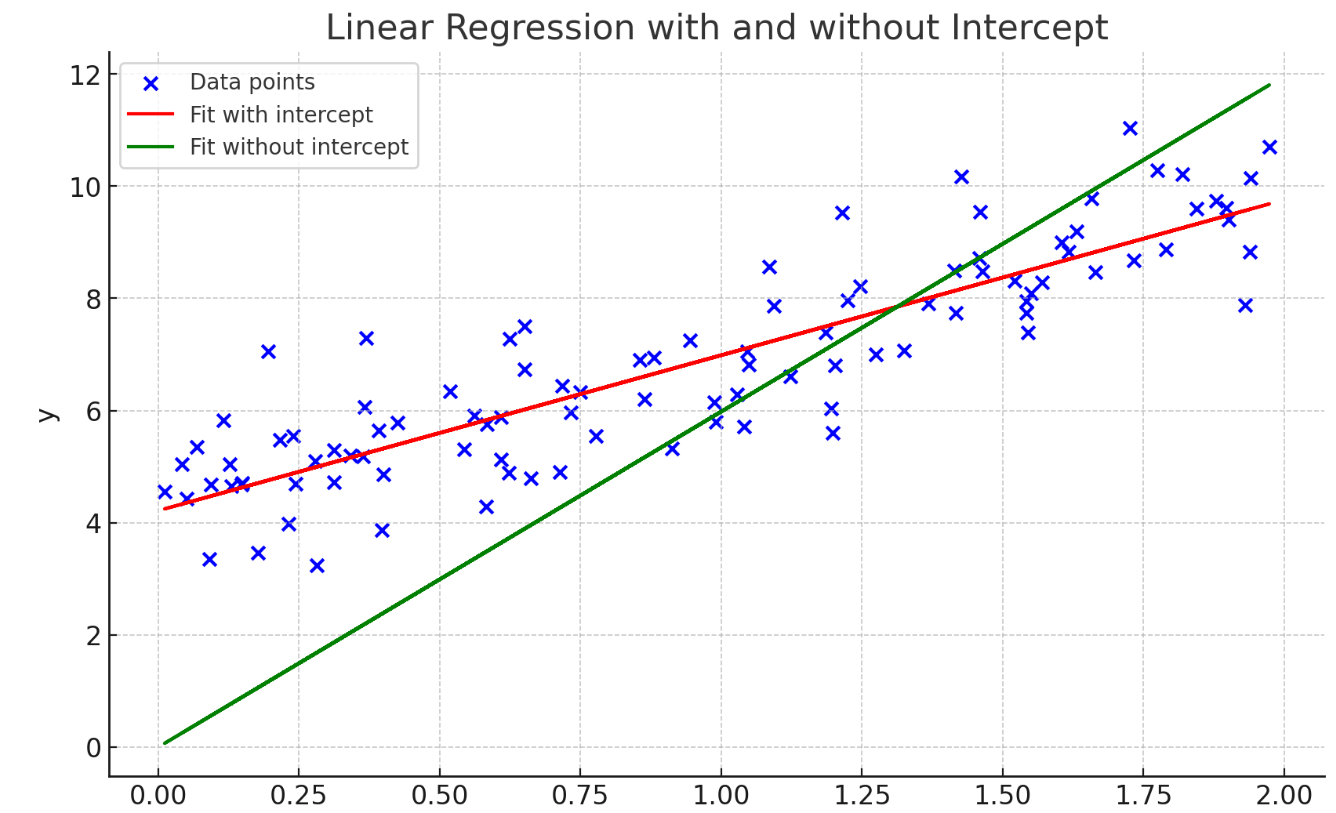

### 
- 신경망의 선형변환 클래스를 구현하기 전에 앞서 선형변환의 역전파는 어떻게 구해지는지 행렬의 shape 관점에서 보자

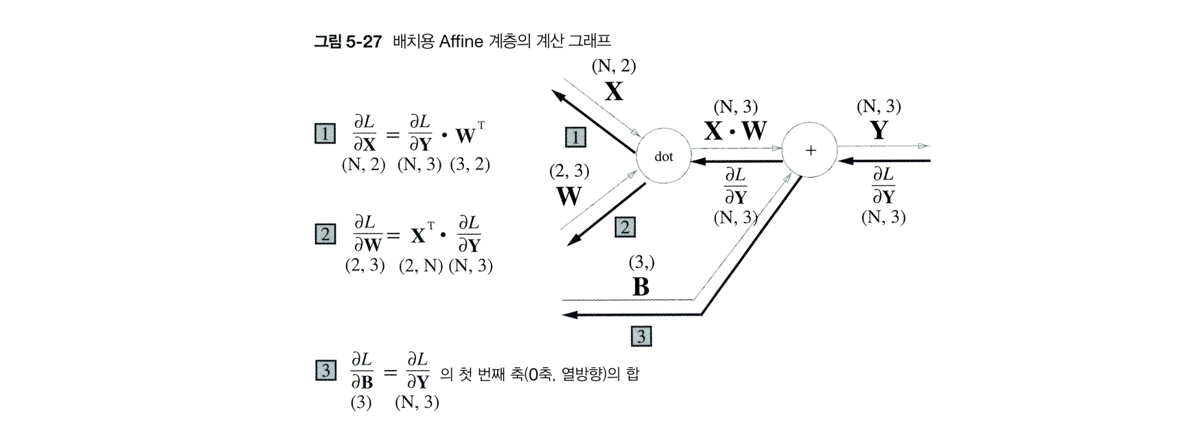

In [23]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(X.T, dout)
        self.db = np.sum(dout, axis=0)
        
        return dx

- 1행 2열인 입력데이터(데이터 1개 특징 2개)   
- 2행 3열인 가중치 행렬   
- 1행 3열인 벡터 절편(편향)

In [14]:
X = np.random.rand(1,2) # 입력 데이터 (데이터 수 1개 특징은 2개)
W = np.random.rand(2,3) # 가중치
B = np.random.rand(1,3) # 편향

In [15]:
print(np.shape(X))
print(np.shape(W))
print(np.shape(B))

(1, 2)
(2, 3)
(1, 3)


- 선형변환 후에 모습은 1행 3열인 Y 가 구해짐

In [16]:
Y = np.dot(X,W) + B
print(Y)
print(np.shape(Y))

[[0.93474645 1.07858524 0.37731624]]
(1, 3)


- 그렇다면 먼저 절편 B 부터 어떻게 미분을 구할까?

In [17]:
X_dot_W = np.array([[0,0,0],
                   [10,10, 10]])
B = np.array([1,2,3])
B = np.reshape(B, (1,3))

In [18]:
print(X_dot_W)
print(np.shape(X_dot_W))

[[ 0  0  0]
 [10 10 10]]
(2, 3)


In [19]:
print(B)
print(np.shape(B))

[[1 2 3]]
(1, 3)


In [20]:
print(X_dot_W + B)

[[ 1  2  3]
 [11 12 13]]


In [21]:
dY = np.array([[1,2,3],
              [4,5,6]])
print(np.shape(dY))
print(dY)

(2, 3)
[[1 2 3]
 [4 5 6]]


In [22]:
dB = np.sum(dY, axis=0)
print(dB)
print(np.shape(dB))

[5 7 9]
(3,)


#### 선형변환에 대한 오차역전파를 통해 미분을 구하는 방법 설명하기 위해 간단한 예시 :
- 우리는 스칼라 형태로도 손실함수의 미분을 계산해보고   
- 벡터, 행렬 형태로도 계산해본 다음   
- 손쉽게 표현할 수 있는 벡터, 행렬 형태로 오차역전파를 구현해볼 것임

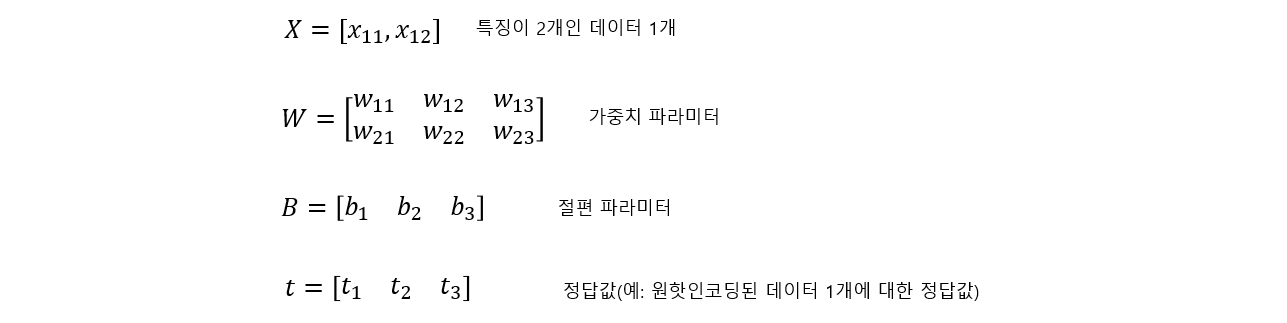

#### 전파(forward)

1. 선형변환

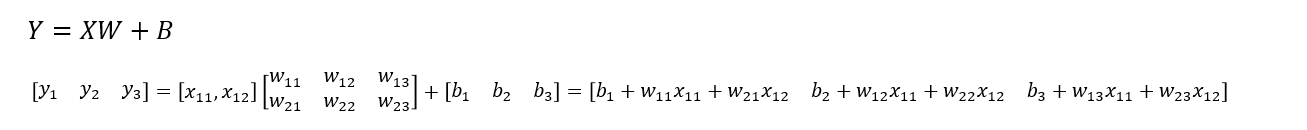

2. 손실함수 값 계산

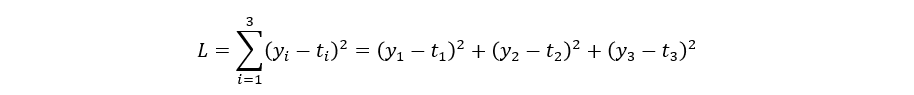

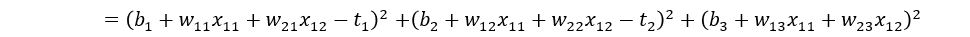

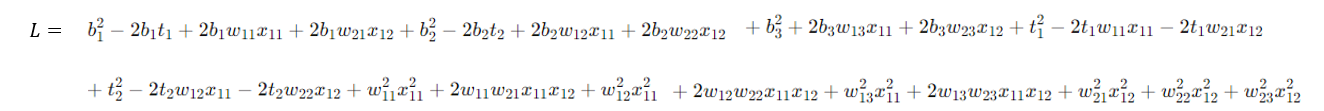

#### 역전파(backward)

- 오차역전파를 구하기 전에 손실함수에 대한 각각의 미분을 보자

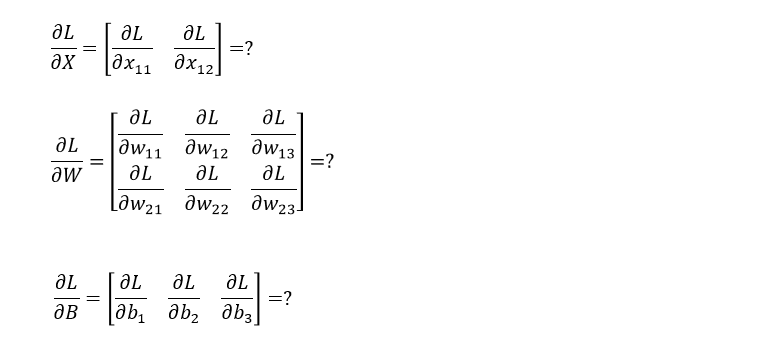

- 손실함수 L에 대해 각 스칼라 변수에 대한 편미분들을 구하여 전개하면 됨

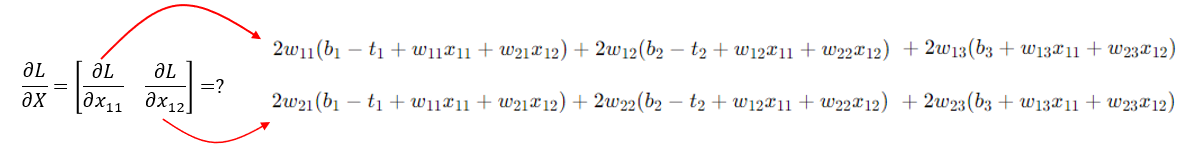

- 하지만 이는 너무 복잡하고 계산 실수 가능성이 많음.
- 이를 벡터 혹은 행렬로 표기하여 다뤄본다면 낱개를 표현하지 않아도 되는 표기의 효율이 생길 수 있음.
- 또한 스칼라로 전개된 수식은 복잡해보이지만 실제로 벡터 혹은 행렬로 표현될 때 특정 패턴이 있다는 것을 볼 수 있음.
- 이를 이용한 것이 선형변환에 대한 오차역전파임.

#### 선형변환(어파인)에 대한 X의 미분 : 행렬형태 표기

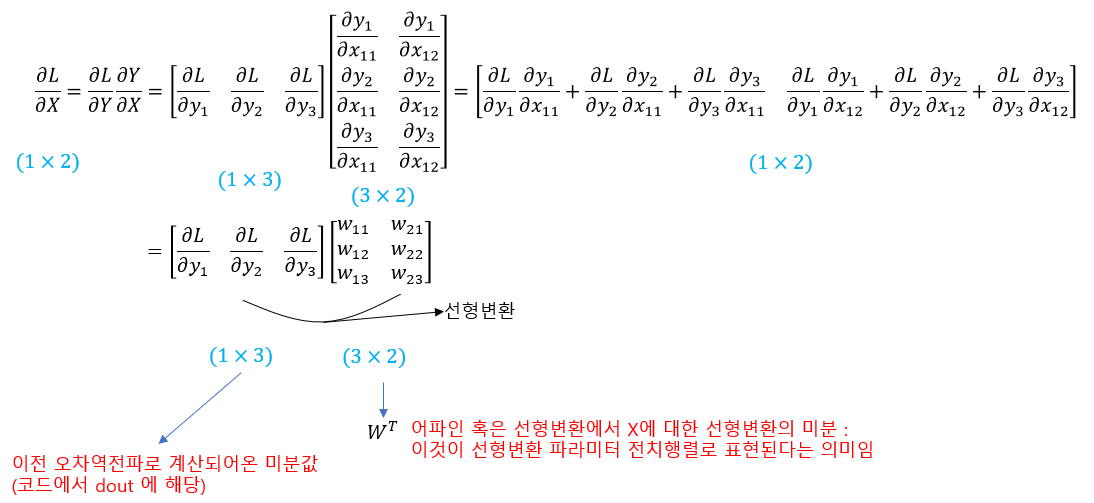

#### 선형변환(어파인)에 대한 W의 미분 : 행렬형태 표기

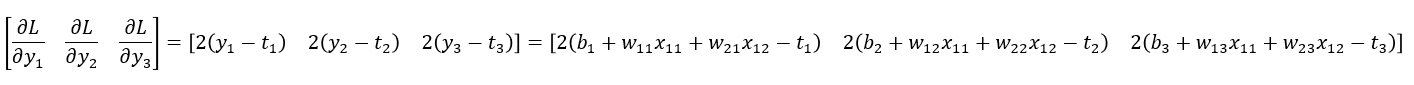

- 이제 손실함수에 대한 선형변환 파라미터 W의 편미분을 구하려고할 때 각각의 스칼라 형식에서의 미분값을 들여다보면   
- dout 꼴에 x만 곱해져 있는 형태인 것을 볼 수 있음.

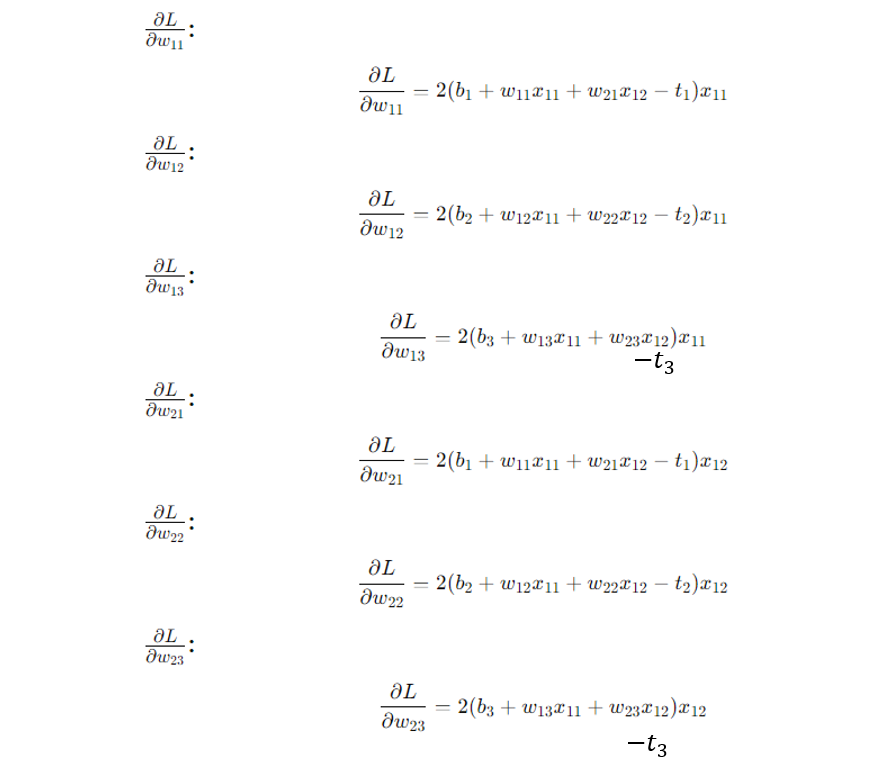

- 이 패턴을 벡터, 행렬을 사용하여 행렬변환으로 표현해보면 아래와 같이 표현할 수 있음

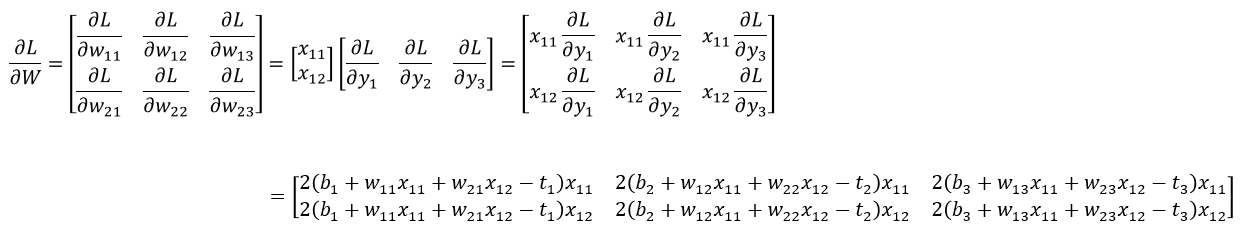

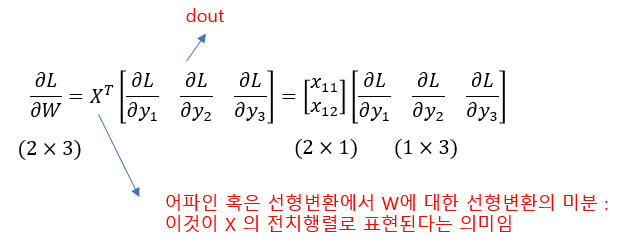

#### 선형변환(어파인)에 대한 B(절편)의 미분 : 행렬형태 표기

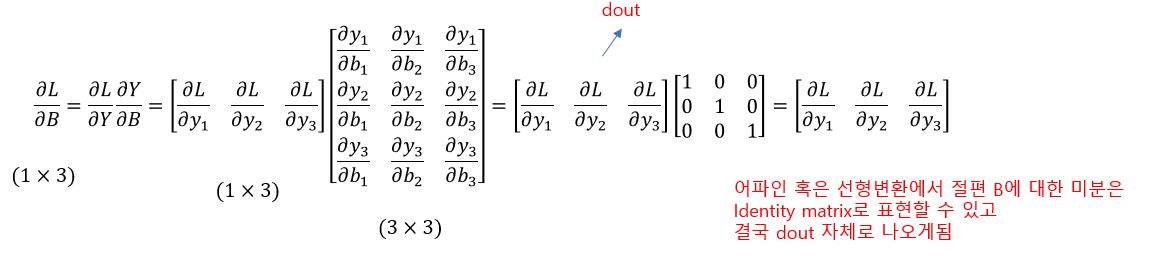

## 
#### 위에는 특징이 2개이고 데이터가 1개인 상황에 대해서 살펴본 것임.
#### 데이터가 n개인 상황에 대해서도 마찬가지로 확장할 수 있음.
- 데이터가 n개인 상황으로 확장해보면 결국 밑에 Affine 클래스와 같이 backward 표현방식으로 표기됨.

In [23]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(X.T, dout)
        self.db = np.sum(dout, axis=0)
        
        return dx

# 
# 

### 5.6.3. Softmax with Loss 계층

- 이번 파트에서는 신경망에서 출력층으로 Softmax를 사용하여 확률 분포로써 출력하는 경우와
- 손실함수로 Cross entropy를 사용할 때
- 이 두 함수가 결합되었을 때 오차역전파 미분에서 계산식이 간편해지는 효과를 얻기위해 사용

- 다시 softmax에 대한 이해로, 숫자 2 이미지가 신경망의 입력으로 주어졌을 때 출력은
- 10차원 원핫 벡터로 표현된 것에서 숫자 2에 대응하는 인덱스가 크게 나와야 함

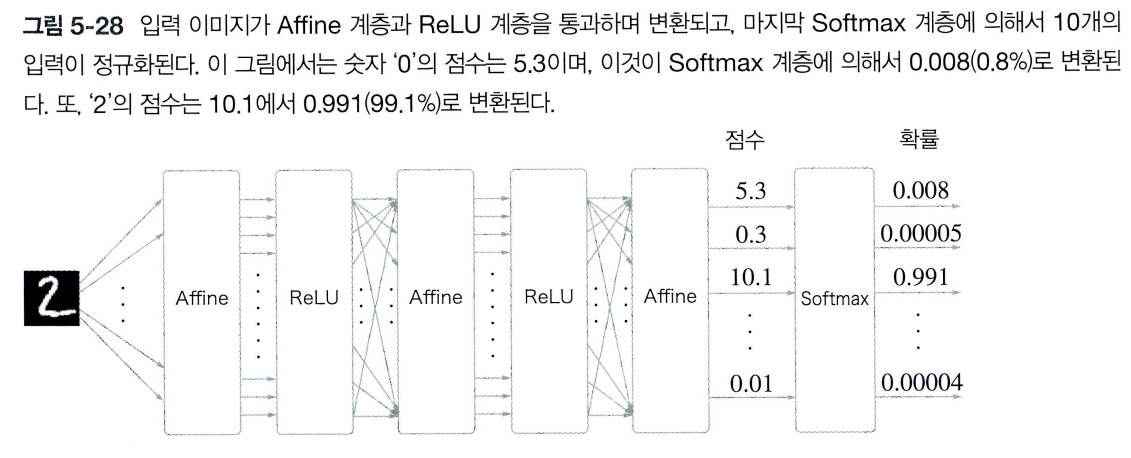

- 여기서 잠깐, softmax를 사용하는 이유 :
1. 출력값을 모두 더했을 때 합이 1이고, 각각의 값들이 확률로써 0과 1 사이를 갖게하려는 의도로 softmax 함수를 취함.
2. 이때 exponential 함수를 취하는 이유는 작은 값일수록 확률을 낮게, 큰 값일수록 확률을 크게 주기 위해 단조증가함수(Monotone increasing function)을 사용함.
3. 음수를 갖지 않고 크기 순으로 유지되면 exponential 함수를 사용하지 않아도 상관없음.
4. 단 exponential 함수 미분했을 때 자기 자신이 나오므로 계산 복잡도에서 유리한 측면이 있음.

In [24]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

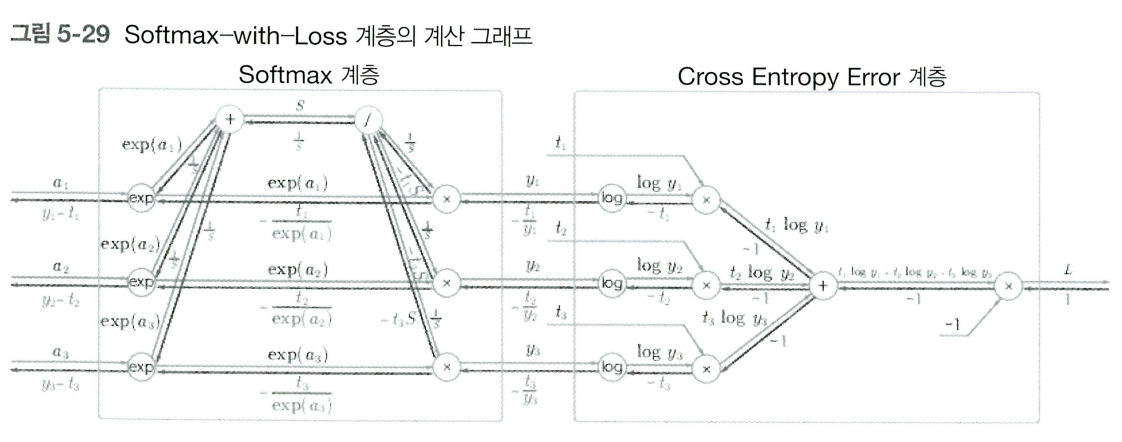

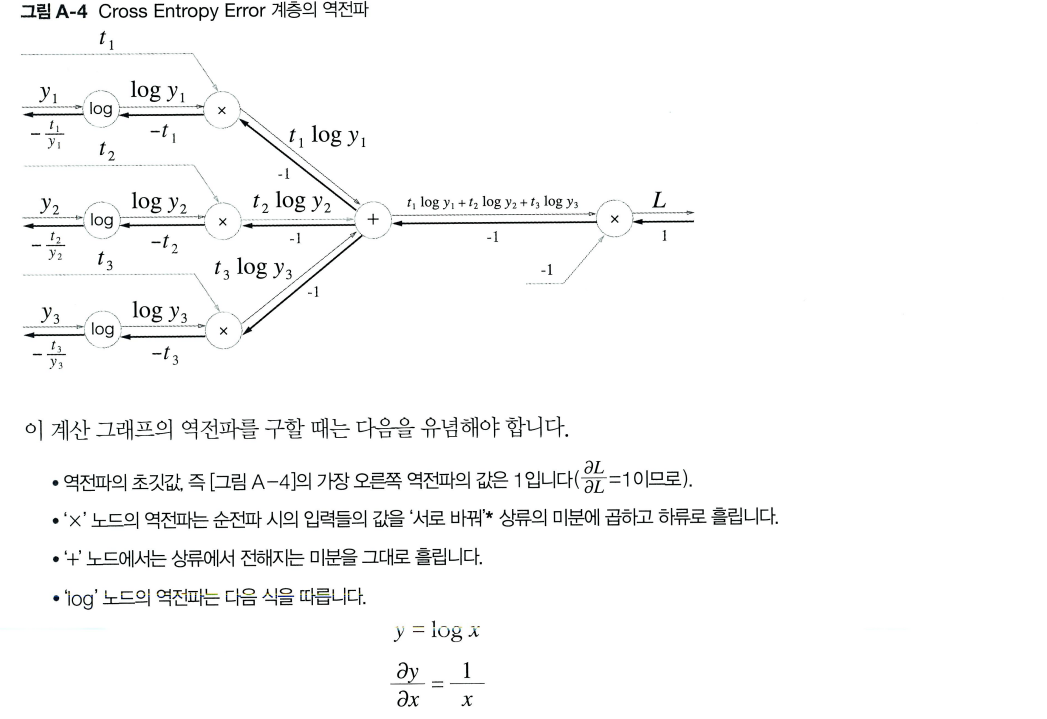

- 자세한 계산은 "밑바닥부터 시작하는 딥러닝 1" 부록 참고

In [25]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
        
    def forward(self,x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        
        return dx

- 예를 들어 데이터가 5개 원핫 클래스가 3개인 5행 3열 데이터를 임의로 만들어 계산해보자

In [26]:
X = np.random.rand(5,3)
print(X)

[[0.39743431 0.41010444 0.67618734]
 [0.335977   0.3464422  0.48607491]
 [0.09600157 0.24277632 0.89717134]
 [0.43819803 0.85499933 0.0067488 ]
 [0.55351003 0.92876677 0.35612391]]


In [29]:
t = np.eye(3)
t = np.r_[t, np.array([[1,0,0], [0,1,0]])]
print(t)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [30]:
softmax_loss = SoftmaxWithLoss()
out = softmax_loss.forward(X,t)
print(out)

0.9979414271860788


In [31]:
dout = 1
dloss = softmax_loss.backward(dout)
print(dloss)

[[-0.14001617  0.06074867  0.07926749]
 [ 0.0630424  -0.13629439  0.07325199]
 [ 0.04559715  0.05280575 -0.0984029 ]
 [-0.13684213  0.09581686  0.04102527]
 [ 0.06104561 -0.11115635  0.05011073]]


# 
## 5.7. 오차역전파법 구현하기

#### 신경망 학습 전체 과정
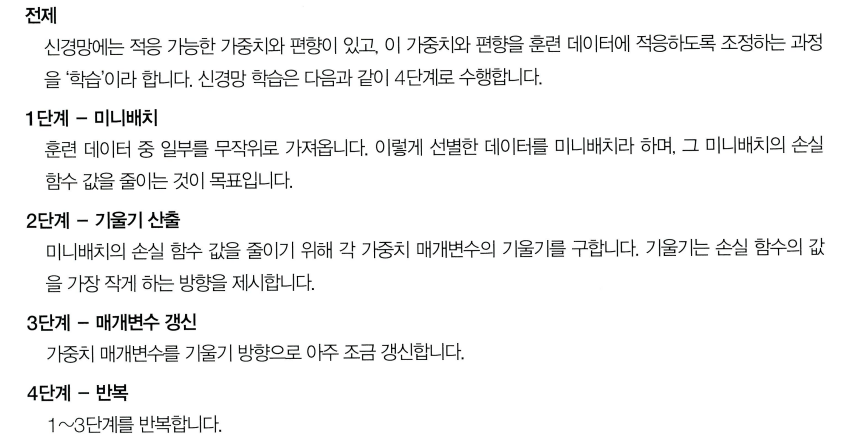

- 필요한 함수를 여기에서는 github에서 다운받아 불러올 것임

In [9]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

### 5.7.3 오차역전파법으로 구한 기울기 검증하기

- 원핫인코딩 함수 구현

In [10]:
def one_hot_encode(t, num_classes):
    num_samples = t.shape[0]
    one_hot_labels = np.zeros((num_samples, num_classes))
    one_hot_labels[np.arange(num_samples), t] = 1
    return one_hot_labels

- MNIST 데이터 불러오기

In [11]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)

#from two_layer_net import TwoLayerNet
from common import *
from tensorflow.keras.datasets import mnist


(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
t_train = one_hot_encode(t=t_train, num_classes=10)
t_test = one_hot_encode(t=t_test, num_classes=10)

print(np.shape(x_train))
print(np.shape(t_train))
print(np.shape(x_test))
print(np.shape(t_test))

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [19]:
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

- MNIST 데이터 Min max 정규화

In [20]:
x_train = x_train / 255
x_test = x_test/ 255
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

- 숫자 데이터 3개 정도로 
- 오차역전파법과 수치미분으로 구한 기울기 차이 구해보기

In [21]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

In [22]:
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ": " + str(diff))

W1: 3.942011740120461e-10
b1: 2.2518276912488615e-09
W2: 5.386934671283532e-09
b2: 1.4043166053634426e-07


- 수치미분과 오차역전파로 구한 기울기의 차이가 매우 작음

### 5.7.4. 오차역전파법을 사용한 학습 구현하기

In [24]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

print("최초 선언한 신경망의 초기값 파라미터 :\n", network.params)

최초 선언한 신경망의 초기값 파라미터 :
 {'W1': array([[-2.63025651e-03, -2.62772195e-03,  7.77238851e-03, ...,
         9.28089896e-03, -1.84358062e-02, -1.01454320e-02],
       [-3.60909643e-03,  3.74990676e-03,  1.33912762e-02, ...,
        -3.05680089e-03, -3.94678326e-03,  2.50135812e-03],
       [-1.63440053e-02,  1.12728076e-03, -1.11763406e-02, ...,
         5.42258660e-03, -2.76566546e-03, -4.78051217e-05],
       ...,
       [-1.69048117e-02, -5.98159647e-03,  1.74896203e-02, ...,
         6.49259463e-03,  6.05716114e-03,  1.35436533e-02],
       [-7.65625897e-03,  3.67446946e-04,  4.59576696e-03, ...,
         1.89677151e-02,  1.16641568e-02,  1.16288079e-02],
       [ 6.04425960e-03,  8.09637989e-03,  1.85579146e-02, ...,
        -2.67696723e-04, -1.78327175e-03, -1.32632790e-02]]), 'b1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [26]:
print(np.shape(network.params['W1']))
print(np.shape(network.params['b1']))
print(np.shape(network.params['W2']))
print(np.shape(network.params['b2']))

(784, 50)
(50,)
(50, 10)
(10,)


In [28]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

print("신경망 학습시작 ")
print("=======================================================")
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

신경망 학습시작 
0.10271666666666666 0.1002
0.9044666666666666 0.9086
0.9230666666666667 0.9243
0.9345833333333333 0.9361
0.9448166666666666 0.9437
0.9515666666666667 0.9496
0.9552 0.951
0.9607833333333333 0.9541
0.9635833333333333 0.9582
0.9654333333333334 0.958
0.9686333333333333 0.963
0.9700833333333333 0.9625
0.9724833333333334 0.9669
0.9733833333333334 0.9657
0.9759833333333333 0.9674
0.9771333333333333 0.9695
0.97805 0.9704


In [29]:
print("학습 후 신경망의 파라미터 :\n", network.params)

학습 후 신경망의 파라미터 :
 {'W1': array([[-2.63025651e-03, -2.62772195e-03,  7.77238851e-03, ...,
         9.28089896e-03, -1.84358062e-02, -1.01454320e-02],
       [-3.60909643e-03,  3.74990676e-03,  1.33912762e-02, ...,
        -3.05680089e-03, -3.94678326e-03,  2.50135812e-03],
       [-1.63440053e-02,  1.12728076e-03, -1.11763406e-02, ...,
         5.42258660e-03, -2.76566546e-03, -4.78051217e-05],
       ...,
       [-1.69048117e-02, -5.98159647e-03,  1.74896203e-02, ...,
         6.49259463e-03,  6.05716114e-03,  1.35436533e-02],
       [-7.65625897e-03,  3.67446946e-04,  4.59576696e-03, ...,
         1.89677151e-02,  1.16641568e-02,  1.16288079e-02],
       [ 6.04425960e-03,  8.09637989e-03,  1.85579146e-02, ...,
        -2.67696723e-04, -1.78327175e-03, -1.32632790e-02]]), 'b1': array([ 0.00791871, -0.00737297, -0.07588617,  0.0740837 , -0.0859707 ,
        0.09788649,  0.07508065,  0.08094343,  0.01068032, -0.14651235,
       -0.13539762,  0.11749975, -0.02371373,  0.03221102,  0.06257